In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv(r"C:\Users\nagar\HelloPython\AnalyticalProjects\JobAuthentication\notebook\data/fake_job_postings.csv")


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
X = df.drop(columns=['fraudulent'], axis=1)
y = df['fraudulent']

In [7]:
X = X.fillna('')

In [9]:
text_columns = X.select_dtypes(include=['object']).columns
X_text = X[text_columns].apply(lambda x: ' '.join(x), axis=1)

In [12]:
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X_text)

In [13]:
X_temp, X_test, y_temp, y_test = train_test_split(X_vectorized, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42) 

In [14]:
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (14304, 5000)
Validation set shape: (1788, 5000)
Test set shape: (1788, 5000)


In [15]:
models = {
   "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()    
}


In [19]:
best_model = None
best_model_name = None
best_test_accuracy = 0.0

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} Validation Accuracy: {val_accuracy:.4f}")

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"  {model_name} - Test Accuracy: {test_accuracy:.4f}")
    print("-" * 50)

    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_model = model
        best_model_name = model_name

Training Random Forest...
Random Forest Validation Accuracy: 0.9782
  Random Forest - Test Accuracy: 0.9793
--------------------------------------------------
Training Logistic Regression...
Logistic Regression Validation Accuracy: 0.9737
  Logistic Regression - Test Accuracy: 0.9709
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting Validation Accuracy: 0.9782
  Gradient Boosting - Test Accuracy: 0.9782
--------------------------------------------------
Training Decision Tree...
Decision Tree Validation Accuracy: 0.9726
  Decision Tree - Test Accuracy: 0.9676
--------------------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors Validation Accuracy: 0.9843
  K-Nearest Neighbors - Test Accuracy: 0.9782
--------------------------------------------------


In [20]:
print(f'Best Model: {best_model_name} with Test Accuracy: {best_test_accuracy:.4f}')

y_best_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_best_pred)



Best Model: Random Forest with Test Accuracy: 0.9793


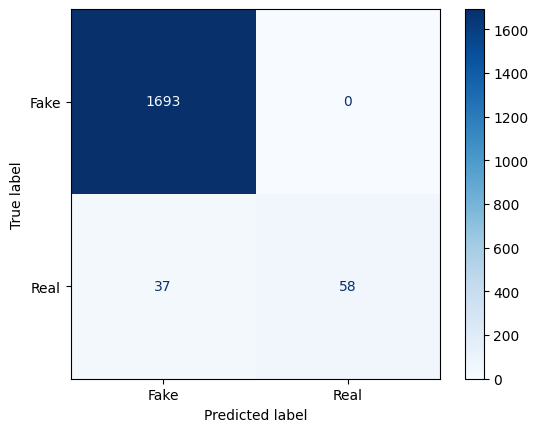

In [21]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Fake", "Real"])
cm_display.plot(cmap="Blues", values_format="d")